## Rejection Sampling
Rejection sampling is a basic Monte Carlo technique to generate observations from a spec-
ied distribution with probability density function (pdf) f(x). In practice, it is used to
draw random variables from a target distribution, f(x), when directly sampling from that
distribution is dicult. The basic idea is to instead sample from a reference distribution,
g(x), which a) is easy to draw from and b) satises the condition that g(x) > 0 whenever
f(x) > 0, and to then selectively accept samples such that sampling from f is achieved.

In [1]:
# Shiman Ding
# 07/09/2016

import numpy as np
import scipy.stats
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import math

## HW 2-1
Write a 1-D rejection sampler in python using tools from scipy.stats. The sampler
should take as input: the functional form of the target distribution, a reference distribution in the form of a scipy.stats object (e.g. scipy.stats.norm(0,1)), and the
number of samples desired. It should output the samples, the value of M, and the
proportion of samples that was accepted.

In [14]:
norm.cdf(3)        # cumulative density function
norm.rvs(size = 3)         # generate random variables
norm.ppf(0.99)     # inverse density

2.3263478740408408

In [244]:
def Rej_sampler_1D(target_f, ref_g, n=10):
    
    # determine M:
    # generate 500 samples, find the largest ratio and modified by ratio 1.1
    u = scipy.stats.uniform.rvs(size = 500)
    x = ref_g.ppf(u)
    ratio = ref_g.pdf(x) / target_f(x)
    print("Obtained M")
    M = 1.1 * max(ratio)
    accepts = []
    rejects = []
    # modify cauchy ratio, because M could be infty
    if (ref_g == scipy.stats.cauchy):
        M = 100
        print(M)
    while(len(accepts) < n):
        u = scipy.stats.uniform.rvs()
        x = ref_g.rvs()
        if (target_f(x) / ref_g.pdf(x) / M > u):
            accepts.append(x)
        else:
            rejects.append(x)
    accept_ratio = float(len(accepts))/(len(rejects)+len(accepts))
    return(M,accepts, accept_ratio)

In [245]:
def target(x):
    return norm.pdf(x)

# 2-2 
Using CAUCHY to approximate LAPLACE

In [246]:
def laplace(x, mu=0.0, b=1.0):
    return (0.5/b * np.exp(-abs(x-mu)/b))

In [247]:
a,b,c = Rej_sampler_1D(laplace, scipy.stats.cauchy, 1000)

Obtained M
100


Populating the interactive namespace from numpy and matplotlib


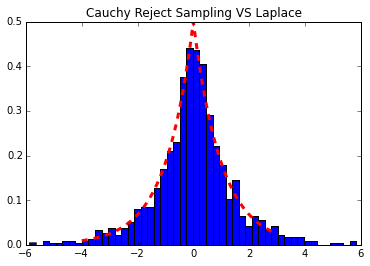

In [249]:
%pylab inline

fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(b, bins=50, normed = True)

x = np.arange(-4, 3, 0.005)
laplace_pdf = np.arange(-4, 3, 0.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,laplace_pdf, 'r--', linewidth=3)

plt.title("Cauchy Reject Sampling VS Laplace")
plt.show()

In [250]:
# Kolmogorov-Smirnov test to see difference between RS and laplace
u = scipy.stats.uniform.rvs(size = 500)
x = laplace(u)
d,p = scipy.stats.ks_2samp(b, x)
p

1.057737584189247e-11

In [232]:
# acceptance rate, this is determined by M
c

0.19349845201238391

#2-3
Using student-t distribution to approximate Laplace distribution

In [261]:
scipy.stats.t(df=2).rvs()

-1.6171100363148705

In [262]:
M2,sample,ratio = Rej_sampler_1D(laplace, scipy.stats.t(df=2), 1000)

Obtained M


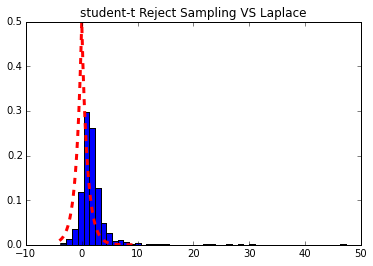

In [265]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(sample, bins=50, normed = True)

x = np.arange(-4, 10, 0.005)
laplace_pdf = np.arange(-4, 10, 0.005)
for i in range(0,len(x)):
    laplace_pdf[i] = scipy.stats.laplace.pdf(float(x[i]))
ax.plot(x,laplace_pdf, 'r--', linewidth=3)

plt.title("student-t Reject Sampling VS Laplace")
plt.show()

In [266]:
u = scipy.stats.uniform.rvs(size = 500)
x = laplace(u)
d,p = scipy.stats.ks_2samp(sample, x)
p

3.2787477684374113e-37

In [268]:
# acceptance ratio
ratio

0.2655337227827934